In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


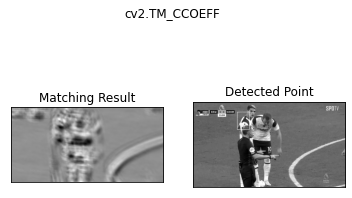

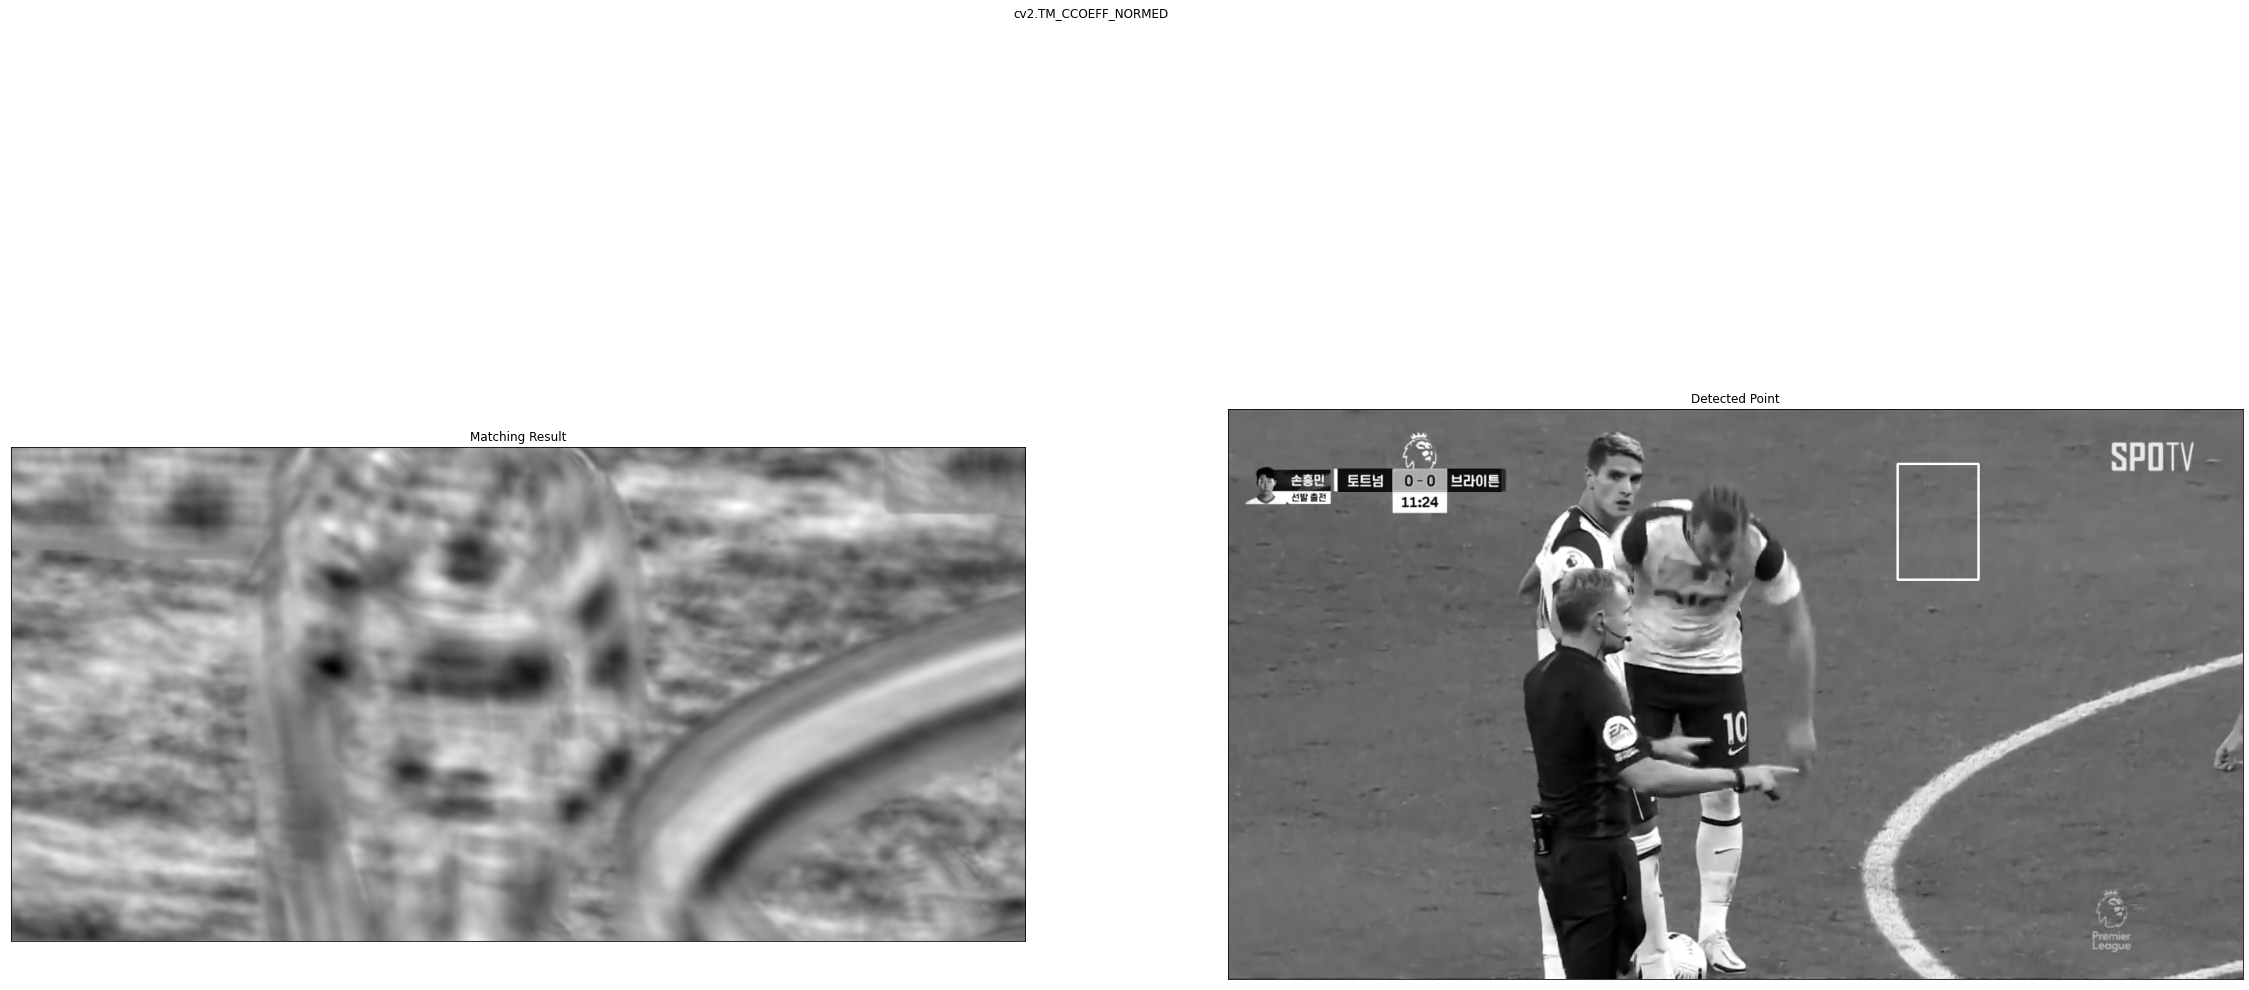

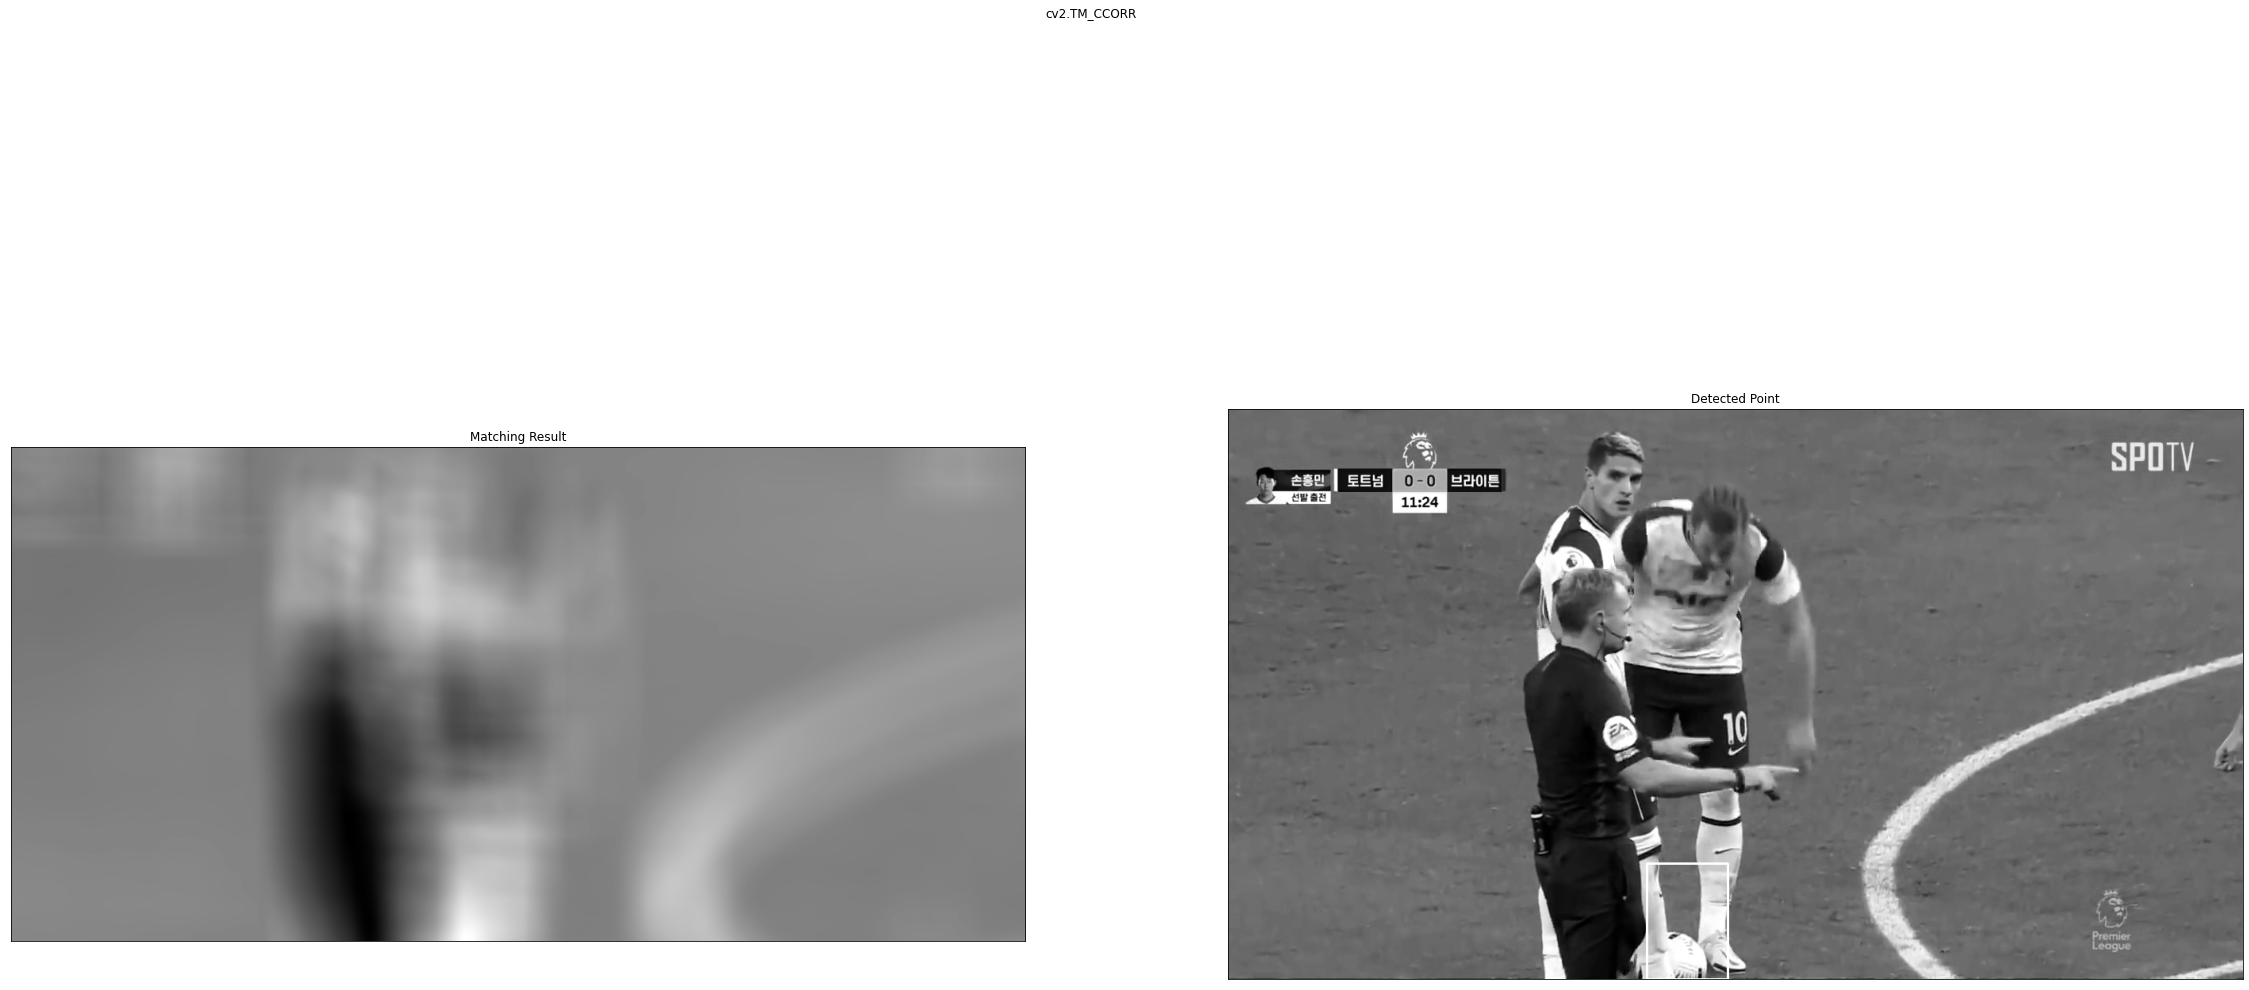

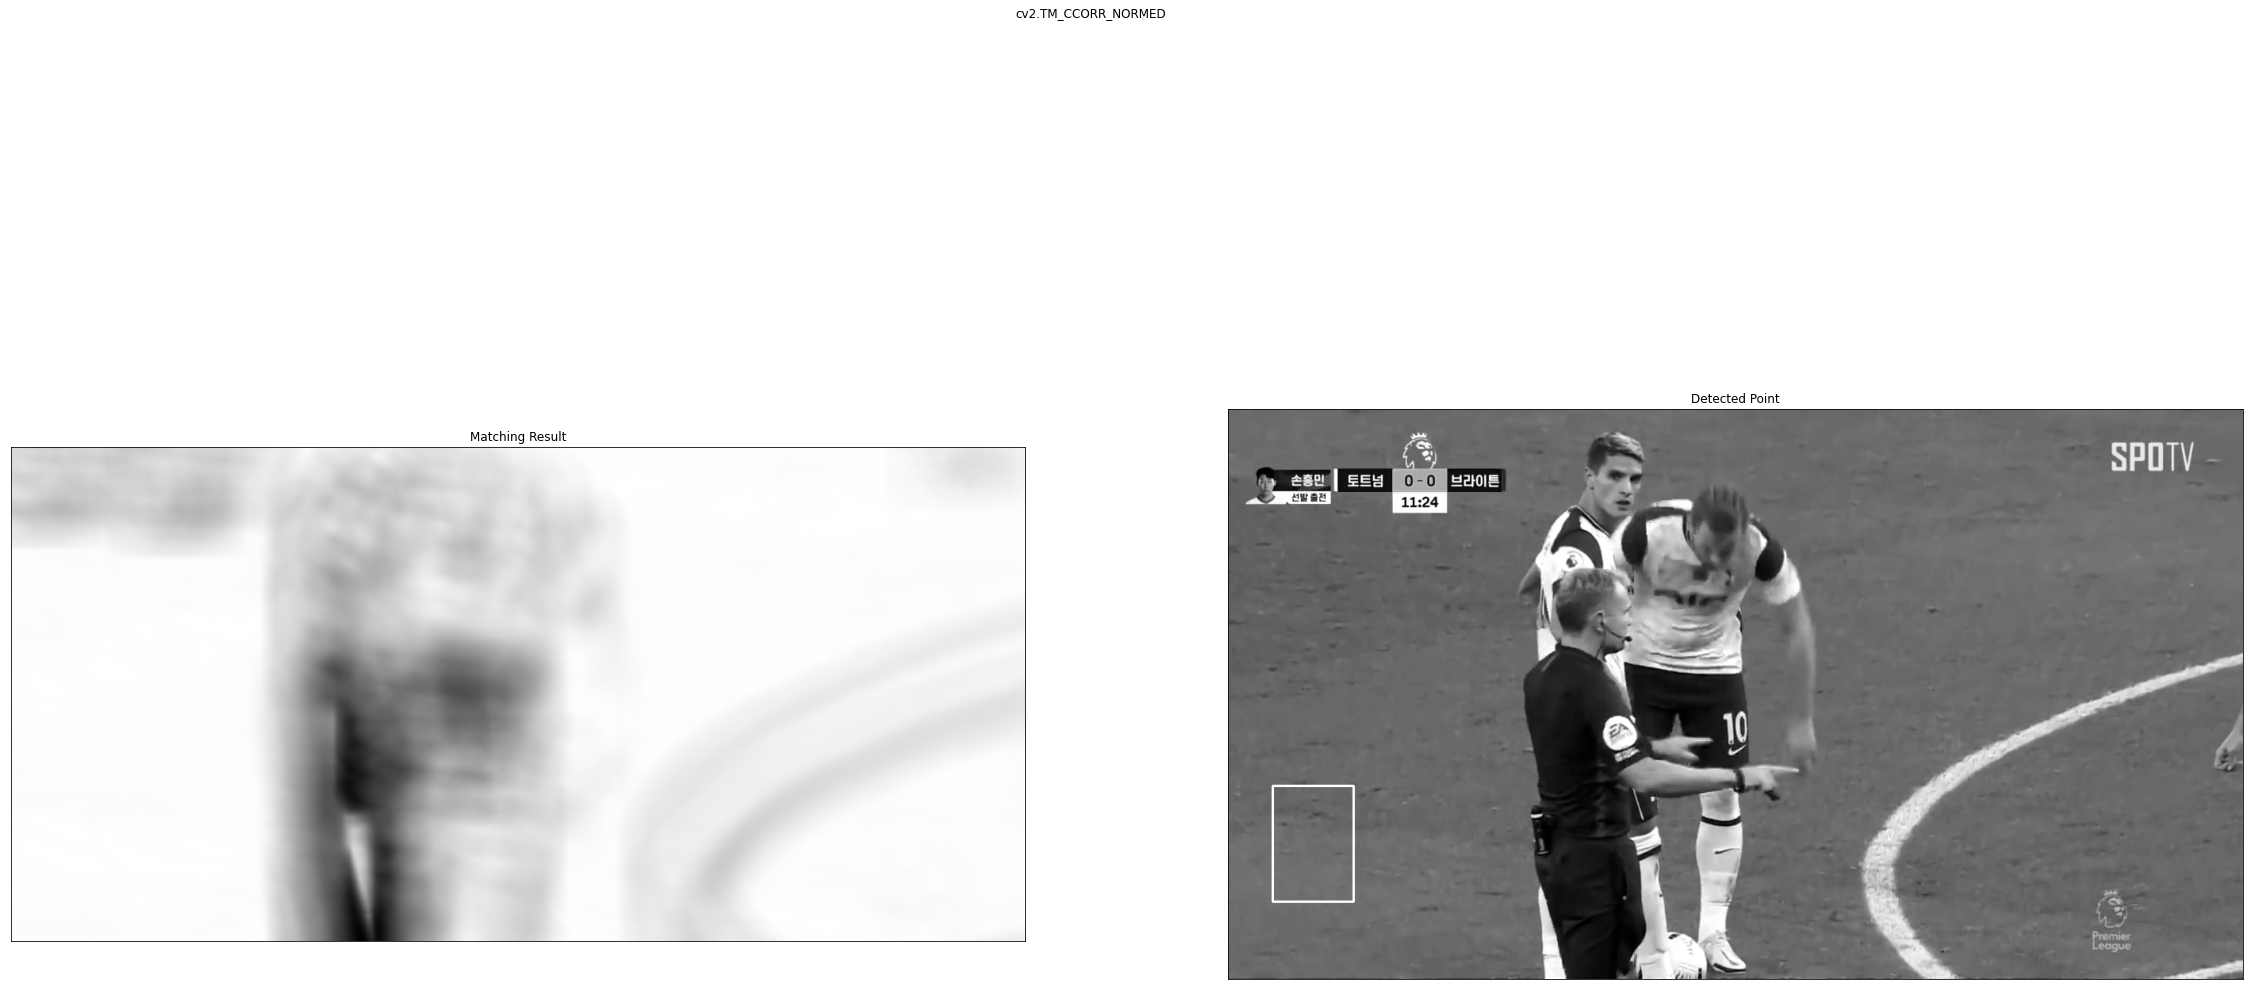

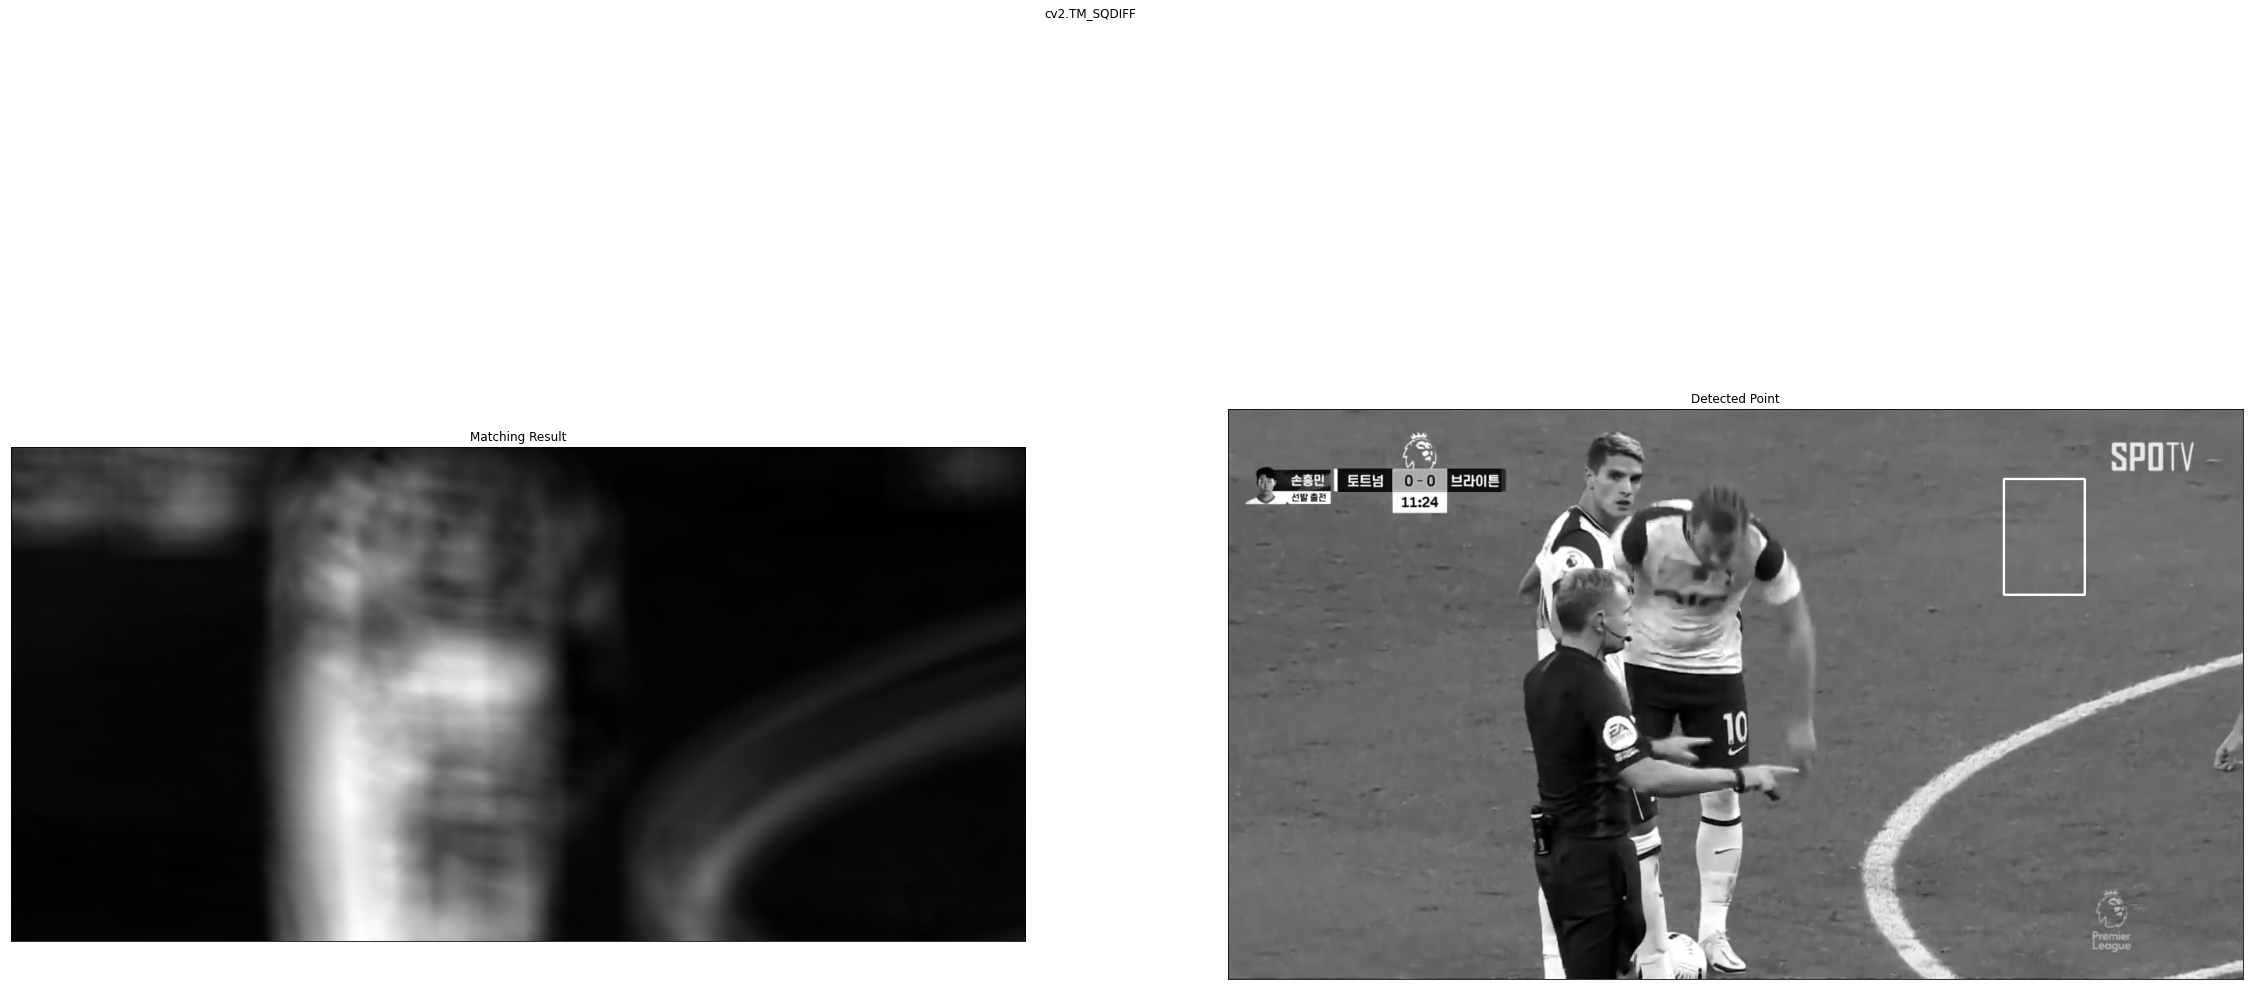

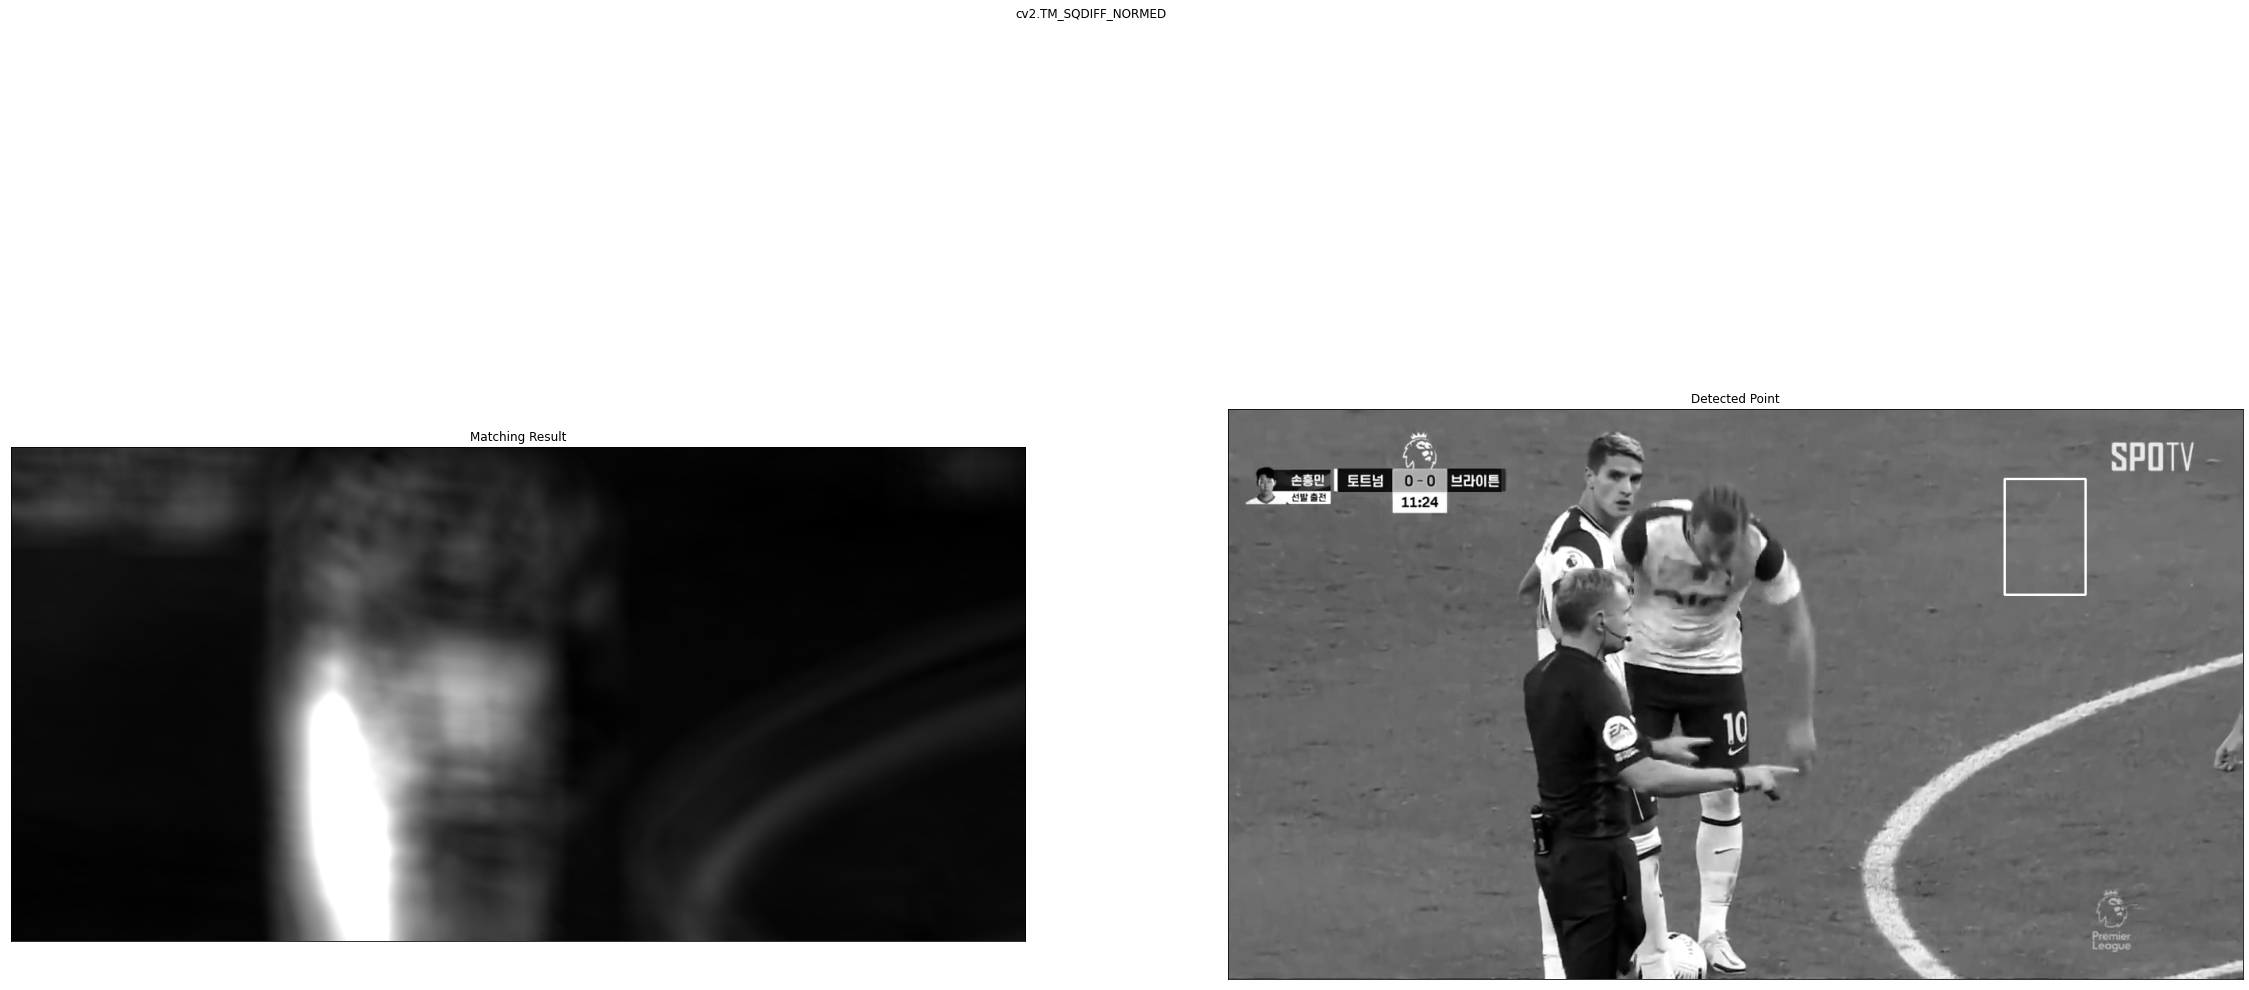

<Figure size 2880x1440 with 0 Axes>

In [4]:
img = cv2.imread('soccer.png',0)
img2 = img.copy()
template = cv2.imread('soccer_man.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()
    plt.figure(figsize=(40,20))

In [5]:
def nothing(x):
    pass

In [6]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

In [ ]:
res=(res-min_val)/(max_val-min_val)
print(res)

In [ ]:
threshold = 0.8
loc = np.where(res >= threshold)

In [ ]:
print(loc[::-1])

In [ ]:
img_rgb = cv2.imread('mario.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [ ]:
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()